# k-means clustering on iris dataset:

In [5]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [8]:
iris = datasets.load_iris()
target = iris.target
x = iris.data
target_names = iris.target_names

# visualizing iris dataset

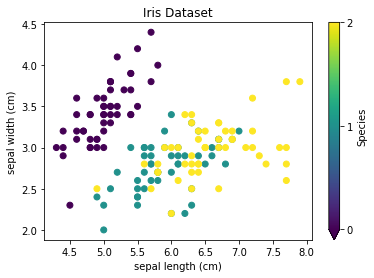

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Iris Dataset')
plt.colorbar(ticks=[0, 1, 2], label='Species', extend='min')
plt.show()

# Deciding optimal clusters using elbow method

/home/huzefaanver/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/huzefaanver/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/huzefaanver/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/huzefaanver/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/huzefa

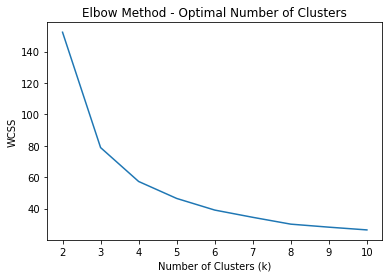

In [12]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.show()

# As we can see above the elbow point which is on 3 so we can say number of cluster 3 will be appropriate

## hyperparameterization of k-means :
#### n_clusters : number of clusters
#### n_init : number of initializations with different positions of centroids
#### max_iter: number of epochs

## model instantiation:

In [3]:
model = KMeans(n_clusters=3, n_init=1, max_iter=100)
model.fit(x)

all_predictions = model.predict(x)
centroids = model.cluster_centers_
centroids

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

(150, 4)

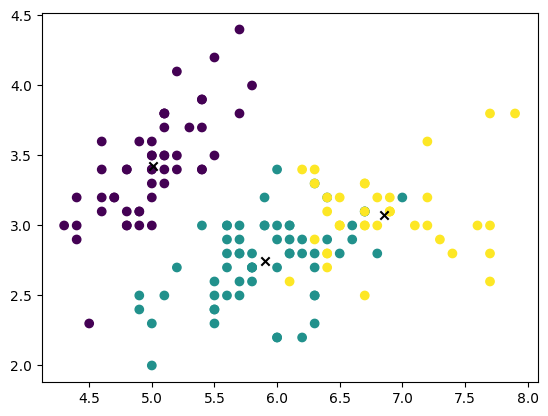

In [4]:
plt.scatter(x[:,0], x[:,1], c=all_predictions)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="black")
plt.show
x.shape

# dimensionality reduction using PCA:

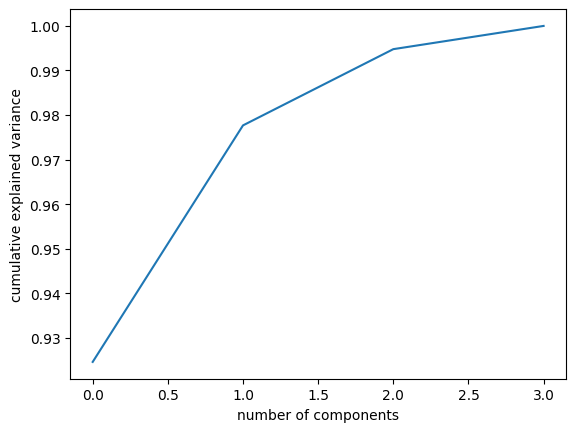

In [5]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

99% of cumulative variance is achieved with 2 components. Therefore 2 components are sufficent to retain data contained in 4 features. Dimensionality will be reduced to 2 from 4

In [6]:
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x)

x_reduced.shape
# x_reduced

(150, 2)

# k-means clustering after PCA:

In [7]:
model.fit(x_reduced)

all_predictions = model.predict(x_reduced)
centroids = model.cluster_centers_
centroids

array([[ 0.66567601, -0.3316042 ],
       [ 2.34652659,  0.27393856],
       [-2.64241546,  0.19088505]])

<function matplotlib.pyplot.show(close=None, block=None)>

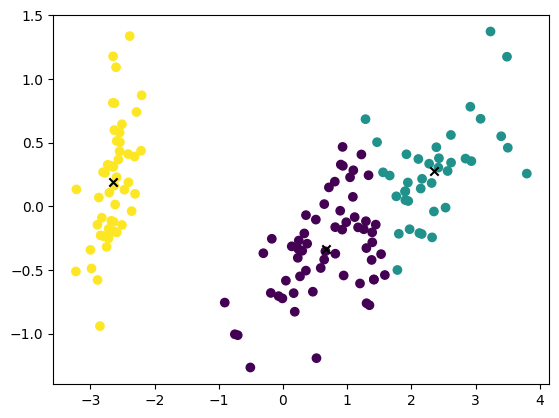

In [9]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=all_predictions)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="BLACK")
plt.show